# Statistical hypothesis testing

URL https://github.com/FIIT-IAU/

**We want to verify whether the number of engine cylinders has an effect on consumption.**

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing

In [2]:
cars = pd.read_csv('data/auto-mpg.data', 
                   sep='\s+',
                   names = ['mpg', 'cylinders', 'displacement','horsepower',
                            'weight', 'acceleration', 'model_year', 'origin', 'name'],
                   na_values='?')
cars.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\marek\AppData\Local\Temp\ipykernel_5384\3894612044.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Homework

a. Check if the difference in fuel consumption between 4-cylinder and 6-cylinder engines is statistically significant.

b. Check if the difference in fuel consumption between 4-cylinder and 5-cylinder engines is statistically significant.

c. An even better approach is to use a statistical test that allows for the comparison of multiple groups at once. The generalization of the t-test for multiple groups is called **ANOVA (Analysis of Variance)**.

Invisible note
<!--
Care should be taken with repeated pair testing. With each additional test, the probability of the 1st order increases. In that case, a correction for retesting should be used, e.g. *Bonferroni correction*, when the $p$-value is compared against the $\alpha / m$ value, where $\alpha$ is the permissible value of the probability of the 1st order error and $m$ is the number of tested hypotheses (pairwise tests).
//-->

In [3]:
cars.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [4]:
cars.cylinders.value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

<Axes: xlabel='cylinders', ylabel='mpg'>

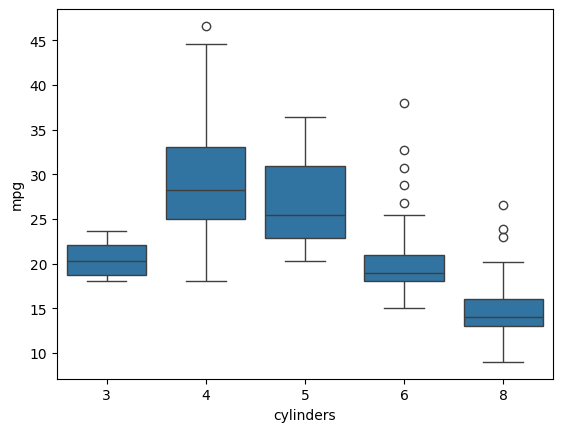

In [5]:
sns.boxplot(x='cylinders', y='mpg', data=cars)

---
### a)

<Axes: xlabel='cylinders', ylabel='mpg'>

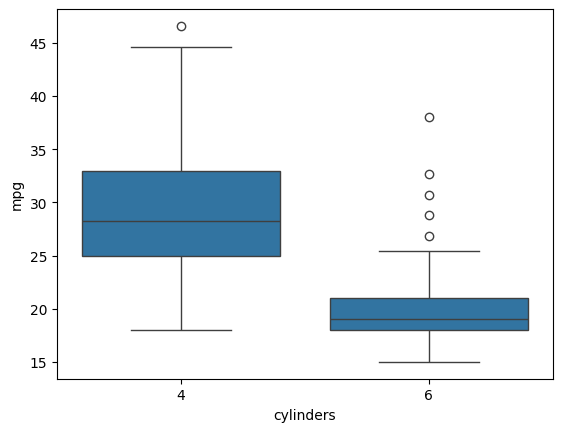

In [6]:
sns.boxplot(x='cylinders', y='mpg', data=cars[(cars.cylinders == 4) | (cars.cylinders == 6)])

Null hypothesis H0: The fuel consumption of 4-cylinder engines is the same on average as the fuel consumption of 6-cylinder engines.

Alternative hypothesis H1: The fuel consumption of 4-cylinder engines is different on average from the fuel consumption of 6-cylinder engines.
- Let our significance level be $\alpha = 0.05$. (95%)

- We can see from the graph that there is a difference between consumption for 4-cylinder and 6-cylinder engines. Now we need to verify statistical significance using test/s.
- Since we have 2 independent groups, we can use the t-test for independent samples (assuming normal distribution of data and same/similar variances).

Verify the assumptions:

In [7]:
mpg4 = cars.loc[cars.cylinders == 4, 'mpg']
mpg4.describe()


count    204.000000
mean      29.286765
std        5.710156
min       18.000000
25%       25.000000
50%       28.250000
75%       33.000000
max       46.600000
Name: mpg, dtype: float64

<Axes: xlabel='mpg', ylabel='Count'>

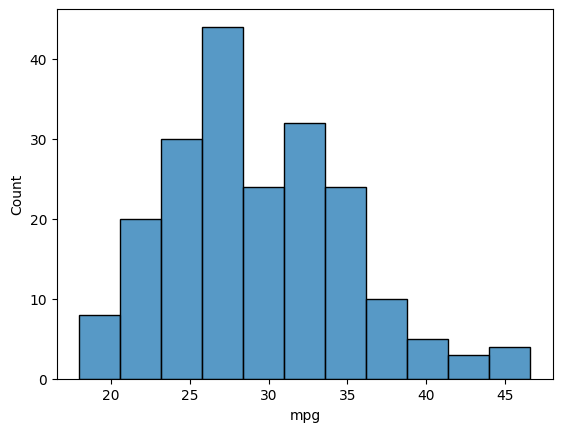

In [8]:
sns.histplot(mpg4)

In [9]:
mpg6 = cars.loc[cars.cylinders == 6, 'mpg']
mpg6.describe()

count    84.000000
mean     19.985714
std       3.807322
min      15.000000
25%      18.000000
50%      19.000000
75%      21.000000
max      38.000000
Name: mpg, dtype: float64

<Axes: xlabel='mpg', ylabel='Count'>

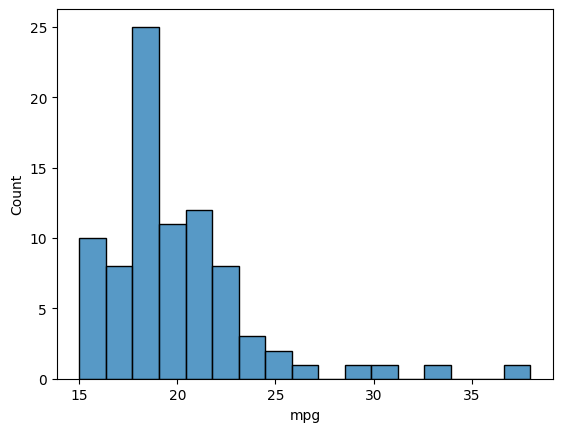

In [10]:
sns.histplot(mpg6)

- From the `boxplot` and `histplot` we can see that the distributions contains outliers. We need to remove them.

In [11]:
# Code from the HomeWork example:
def identify_outliers(data):
    lower = data.quantile(0.25) - 1.5 * stats.iqr(data)
    upper = data.quantile(0.75) + 1.5 * stats.iqr(data)
    
    return data[(data > upper) | (data < lower)]


In [12]:
mpg4_outliers = identify_outliers(mpg4)
mpg4_outliers

322    46.6
Name: mpg, dtype: float64

In [13]:
mpg4 = mpg4.drop(mpg4_outliers.index)

<Axes: xlabel='mpg', ylabel='Count'>

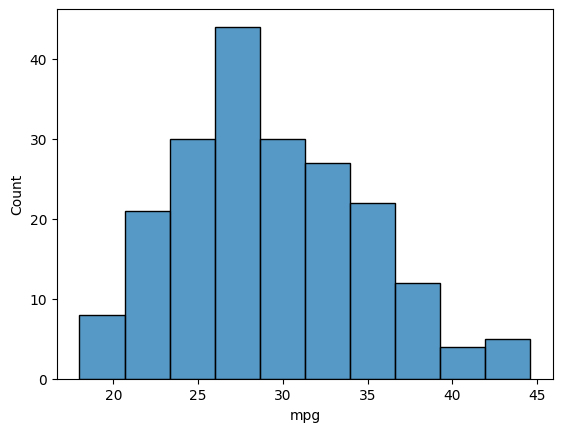

In [14]:
sns.histplot(mpg4)

In [15]:
mpg6_outliers = identify_outliers(mpg6)
mpg6_outliers

306    28.8
307    26.8
333    32.7
360    30.7
387    38.0
Name: mpg, dtype: float64

In [16]:
mpg6 = mpg6.drop(mpg6_outliers.index)

<Axes: xlabel='mpg', ylabel='Count'>

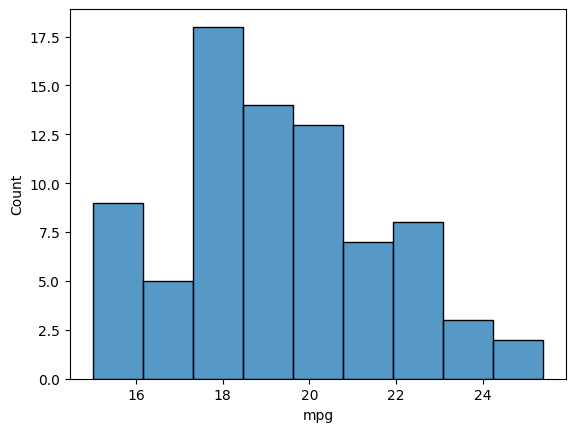

In [17]:
sns.histplot(mpg6)

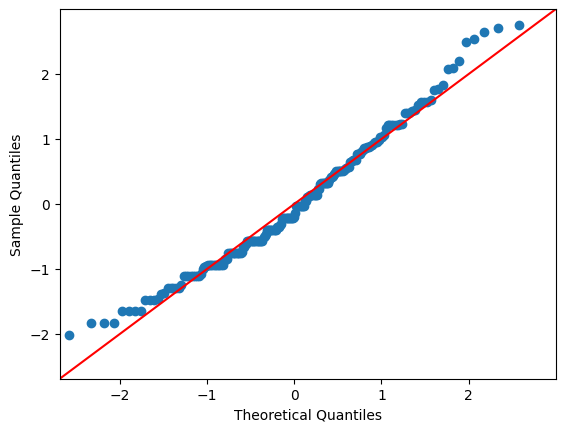

In [18]:
# _ = to not print twice
_ = sm.ProbPlot(mpg4, fit=True).qqplot(line='45')

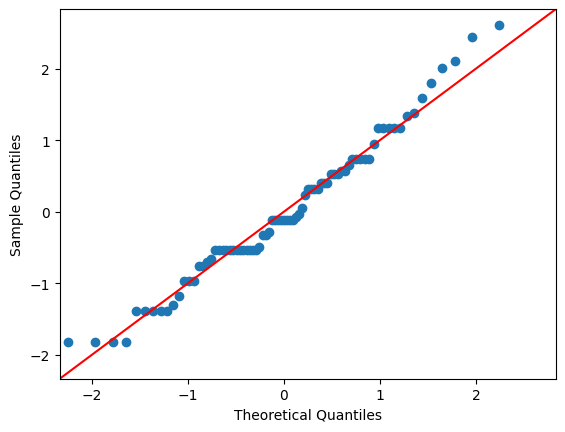

In [19]:
# _ = to not print twice
_ = sm.ProbPlot(mpg6, fit=True).qqplot(line='45')

- If we plot the data using QQ plot and they are on the 45-degree line, we can assume that they come from normal distribution.
- In this case it isnt clear enough, so we need to test it.

- We can use the Shapiro-Wilk test for normality, to see if the data comes from a normal distribution.
    - If the p-value is greater than 0.05, we can assume that the data comes from a normal distribution.

In [20]:
stats.shapiro(mpg4)

ShapiroResult(statistic=0.9778177738189697, pvalue=0.0026729200035333633)

In [21]:
stats.shapiro(mpg6)

ShapiroResult(statistic=0.9750955104827881, pvalue=0.12479004263877869)

- Now we found out for sure that both data does not come from a normal distribution (`mpg4` does not while `mpg6` does). That means the assumptions for t-test were not met, so we need to use the non-parametric version of t-test e.g. Mann-Whitney U-test.


- Assumptions for Mann-Whitney U-test:
    - We need to have at least 20 observations in each sample. (The power increases with sample size).

In [22]:
stats.mannwhitneyu(mpg4, mpg6)

MannwhitneyuResult(statistic=15474.0, pvalue=7.6391524456552e-34)

- Since the p-value is less than 0.05, we reject the null hypothesis and conclude that the fuel consumption of 4-cylinder engines is different on average from the fuel consumption of 6-cylinder engines. We conclude that the difference is statistically significant.

### b)

<Axes: xlabel='cylinders', ylabel='mpg'>

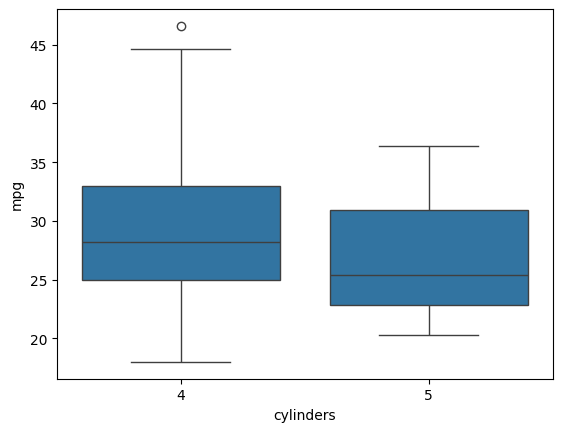

In [ ]:
sns.boxplot(x='cylinders', y='mpg', data=cars[(cars.cylinders == 4) | (cars.cylinders == 5)])

Null hypothesis H0: The fuel consumption of 4-cylinder engines is the same on average as the fuel consumption of 5-cylinder engines.

Alternative hypothesis H1: The fuel consumption of 4-cylinder engines is different on average from the fuel consumption of 5-cylinder engines.
- Let our significance level be $\alpha = 0.05$. (95%)

- We can see from the graph that there is a slight difference between consumption for 4-cylinder and 5-cylinder engines. Now we need to verify statistical significance using test/s.
- Since we have 2 independent groups, we can use the t-test for independent samples (assuming normal distribution of data and same/similar variances).

Verify the assumptions:
(We aleready have the data for mgp4 from previous task, so we only need to check the data for mpg5)

In [ ]:
mpg5 = cars.loc[cars.cylinders == 5, 'mpg']
mpg5.describe()


count     3.000000
mean     27.366667
std       8.228204
min      20.300000
25%      22.850000
50%      25.400000
75%      30.900000
max      36.400000
Name: mpg, dtype: float64

<Axes: xlabel='mpg', ylabel='Count'>

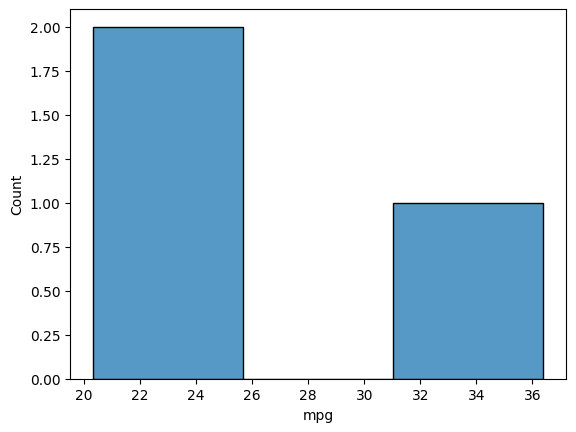

In [ ]:
sns.histplot(mpg5)

- Since we know that the sample size of the `mpg5` is just 3, we could probably tell that the data does not come from a normal distribution, but we can still test it.

- We can skip the identification of outliers since we know that there are none. (from to boxplot)

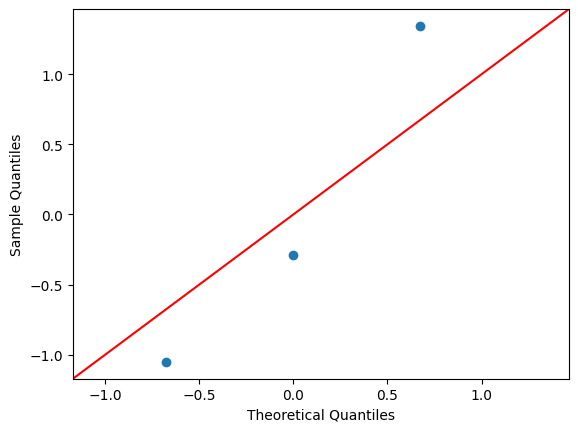

In [26]:
# _ = to not print twice
_ = sm.ProbPlot(mpg5, fit=True).qqplot(line='45')

- If we plot the data using QQ plot and they are on the 45-degree line, we can assume that they come from normal distribution.
- In this case the sample size of 3 is not representative enough to make a conclusion.

- We can use the Shapiro-Wilk test for normality, to see if the data comes from a normal distribution.
    - If the p-value is greater than 0.05, we can assume that the data comes from a normal distribution.

In [27]:
stats.shapiro(mpg5)

ShapiroResult(statistic=0.9571536779403687, pvalue=0.6017925521570362)

- Now we found out for sure that both data does not come from a normal distribution (`mpg4` does not while `mpg5` does). That means the assumptions for t-test were not met, so we need to use the non-parametric test. 
- Saying `mgp5` comes from a normal distribution is a bit of a stretch because of the small sample size but we continue with the assumption that it does.

- Now we cannot use the Mann-Whitney U-test because it requires at least 20 observations in each sample. We can use the Kruskal-Wallis h-test instead.


In [28]:
stats.kruskal(mpg4, mpg5)

KruskalResult(statistic=0.3260991885626341, pvalue=0.5679651056541517)

- Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that the fuel consumption of 4-cylinder engines is the same on average as the fuel consumption of 5-cylinder engines. We conclude that the difference is not statistically significant.

### c)

Null hypothesis H0: The fuel consumption of 4-cylinder engines is the same on average as the fuel consumption of 5-cylinder and 6-cylinder engines.

Alternative hypothesis H1: The fuel consumption of 4-cylinder engines is different on average from the fuel consumption of 5-cylinder and 6-cylinder engines.
- Let our significance level be $\alpha = 0.05$. (95%)

With everything we know from previous tasks, we can now use the non-parametric version of ANOVA test to compare the fuel consumption of 4-cylinder, 5-cylinder, and 6-cylinder engines.

In [29]:
stats.kruskal(mpg4, mpg5, mpg6)

KruskalResult(statistic=147.2915292465624, pvalue=1.0376498044473397e-32)

- We found out, that in the end the p-value of the three groups is less than 0.05, so we reject the null hypothesis and conclude that the fuel consumption of 4-cylinder engines is different on average from the fuel consumption of 5-cylinder engines and 6-cylinder engines. We conclude that the difference is statistically significant.

- In other words, the number of engine cylinders has an effect on consumption.